In [49]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [92]:
import os
import nrrd
import mahotas as mh
from PIL import Image

In [45]:
#DATAPATH = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/'

In [93]:
DATAPATH = '/Users/jiehyun/Jenna/UMassBoston/Research/Nathan_Arnett_Calcification/'

In [94]:
DATASETS = [v for v in os.listdir(DATAPATH) if os.path.isdir(DATAPATH + v)]

In [ ]:
# DATASETS - [0] ~ [34]

In [65]:
# grab one dataset
D = DATASETS[0]

In [66]:
files = os.listdir(DATAPATH + D)
label_file = [os.path.join(DATAPATH, D, s) for s in files if 'seg' in s][0]
image_file = [os.path.join(DATAPATH, D, i) for i in files if not 'seg' in i][0]

In [67]:
label = nrrd.read(label_file)[0]
image = nrrd.read(image_file)[0]

In [68]:
print('Plaque segment count:', label.max())

Plaque segment count: 3


In [69]:
bbox = mh.bbox(label) # ignore large portion of label since its all 0
                      # to only include annotated plaque regions

In [70]:
# crop label and image according to bbox but make it a little larger
increase_xy = 10 
increase_z = 0 # no increase in z
label_cropped = label[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                      bbox[2]-increase_xy:bbox[3]+increase_xy,
                      bbox[4]-increase_z:bbox[5]+increase_z]
image_cropped = image[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                      bbox[2]-increase_xy:bbox[3]+increase_xy,
                      bbox[4]-increase_z:bbox[5]+increase_z]

print('Image/Label shape', image_cropped.shape)

Image/Label shape (149, 50, 29)


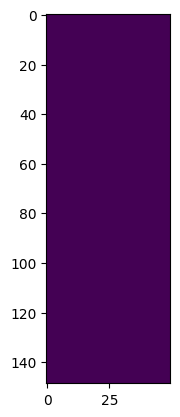

In [71]:
imshow(label_cropped[:,:,5])

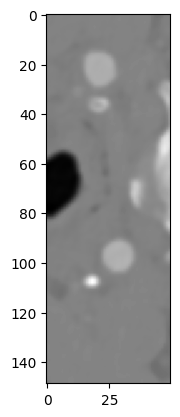

In [72]:
imshow(image_cropped[:,:,5], cmap='gray')

Plaque segment count: 6
Image/Label shape (115, 37, 33)


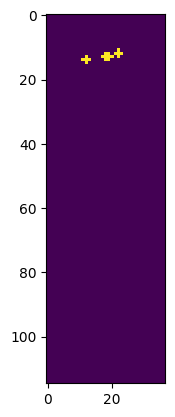

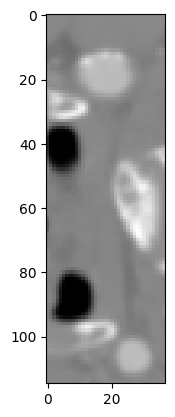

In [76]:
#
# and now one more dataset
# 
D = DATASETS[3]

files = os.listdir(DATAPATH + D)
label_file = [os.path.join(DATAPATH, D, s) for s in files if 'seg' in s][0]
image_file = [os.path.join(DATAPATH, D, i) for i in files if not 'seg' in i][0]

label = nrrd.read(label_file)[0]
image = nrrd.read(image_file)[0]
print('Plaque segment count:', label.max())

bbox = mh.bbox(label) # ignore large portion of label since its all 0
                      # to only include annotated plaque regions
    
# crop label and image according to bbox but make it a little larger
increase_xy = 10 
increase_z = 0 # no increase in z
label_cropped = label[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                      bbox[2]-increase_xy:bbox[3]+increase_xy,
                      bbox[4]-increase_z:bbox[5]+increase_z]
image_cropped = image[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                      bbox[2]-increase_xy:bbox[3]+increase_xy,
                      bbox[4]-increase_z:bbox[5]+increase_z]

print('Image/Label shape', image_cropped.shape)

imshow(label_cropped[:,:,5])
plt.figure()
imshow(image_cropped[:,:,5], cmap='gray')

In [74]:
all_images = []
all_labels = []

for z in range(image_cropped.shape[2]):
    
    # binarize the cropped label
    label_cropped_bin = label_cropped[:,:,z].copy().astype(np.bool_)
    label_cropped_bin[label_cropped[:,:,z] > 0] = 1
    
    all_images.append(image_cropped[:,:,z])
    all_labels.append(label_cropped_bin)
        
# now we have all slices for one dataset seperated
len(all_images)

33

In [ ]:
# NEXT STEPS:
# do this for all datasets and then make sure we pad them to the max size so we can train a unet


Plaque segment count: 3
Image/Label shape (149, 50, 29)
Plaque segment count: 6
Image/Label shape (82, 40, 21)
Plaque segment count: 5
Image/Label shape (179, 47, 19)
Plaque segment count: 6
Image/Label shape (115, 37, 33)
Plaque segment count: 3
Image/Label shape (133, 42, 5)
Plaque segment count: 6
Image/Label shape (164, 64, 16)
Plaque segment count: 5
Image/Label shape (174, 61, 13)
Plaque segment count: 7
Image/Label shape (170, 54, 16)
Plaque segment count: 2
Image/Label shape (212, 59, 4)
Plaque segment count: 4
Image/Label shape (167, 45, 28)


/var/folders/w2/kjqd2k2x70z1qwx2jy2y7j580000gn/T/ipykernel_16148/4093736637.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Plaque segment count: 5
Image/Label shape (130, 45, 7)
Plaque segment count: 3
Image/Label shape (155, 42, 10)
Plaque segment count: 3
Image/Label shape (147, 53, 14)
Plaque segment count: 2
Image/Label shape (121, 41, 9)
Plaque segment count: 6
Image/Label shape (209, 56, 18)
Plaque segment count: 6
Image/Label shape (143, 39, 14)
Plaque segment count: 3
Image/Label shape (152, 38, 19)
Plaque segment count: 2
Image/Label shape (150, 48, 5)
Plaque segment count: 3
Image/Label shape (144, 60, 25)
Plaque segment count: 6
Image/Label shape (166, 56, 14)
Plaque segment count: 5
Image/Label shape (127, 42, 18)
Plaque segment count: 4
Image/Label shape (142, 52, 11)
Plaque segment count: 4
Image/Label shape (167, 45, 11)
Plaque segment count: 2
Image/Label shape (133, 46, 19)
Plaque segment count: 7
Image/Label shape (35, 32, 22)
Plaque segment count: 6
Image/Label shape (122, 47, 12)
Plaque segment count: 2
Image/Label shape (127, 48, 9)
Plaque segment count: 3
Image/Label shape (126, 74, 2

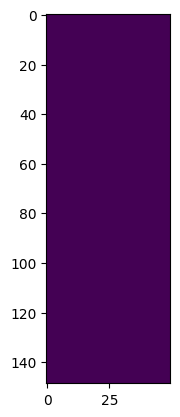

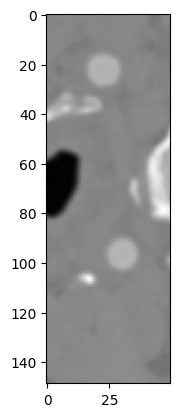

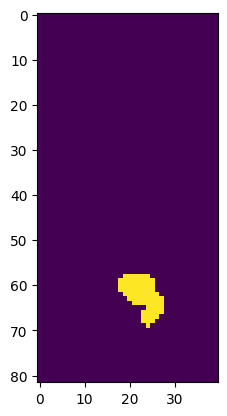

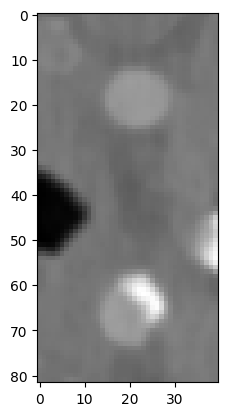

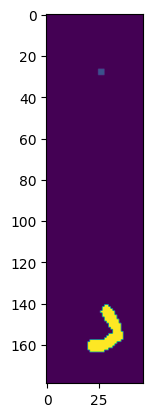

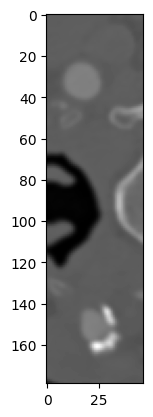

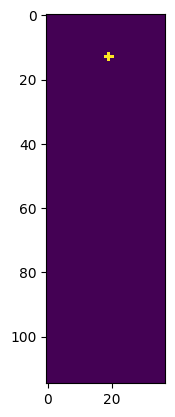

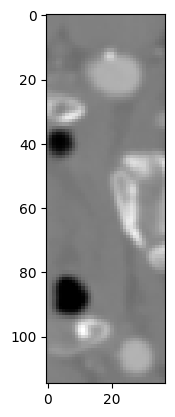

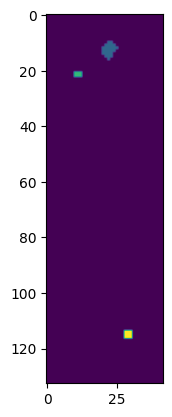

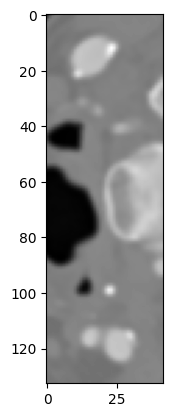

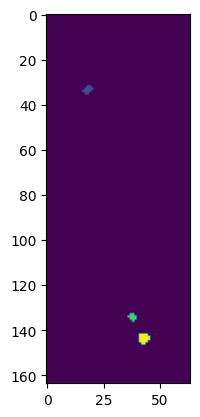

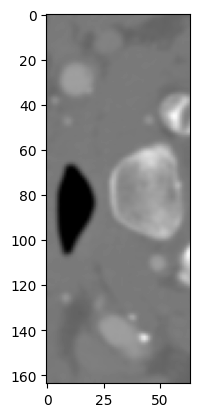

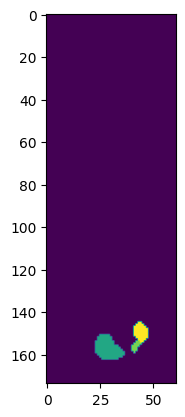

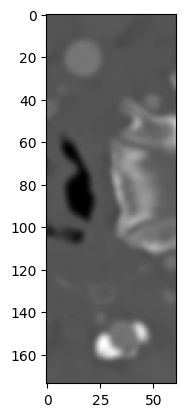

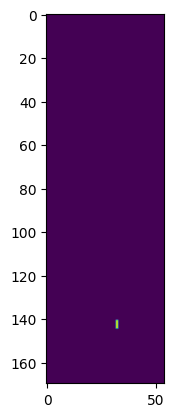

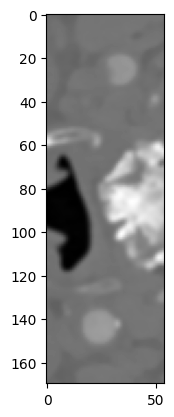

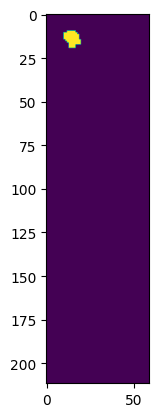

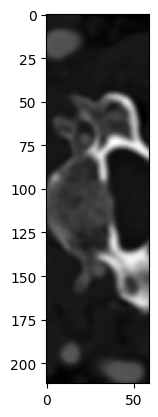

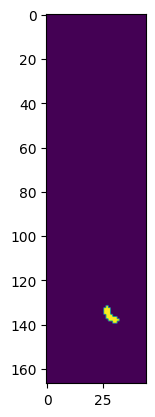

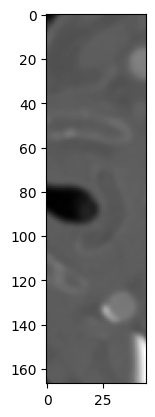

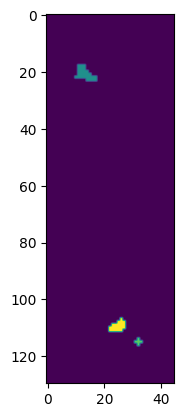

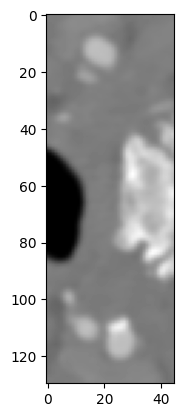

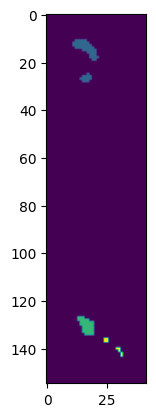

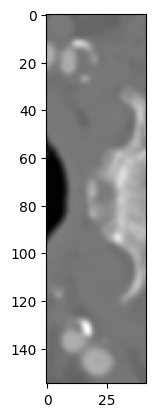

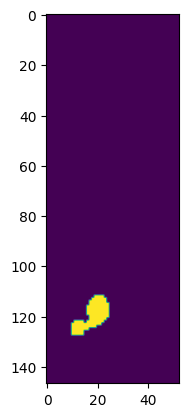

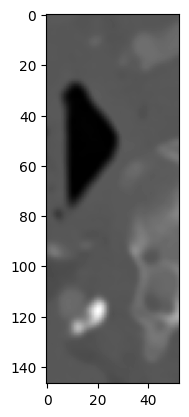

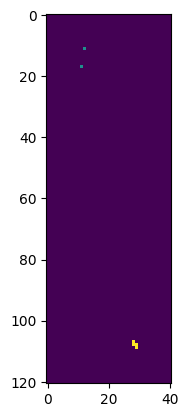

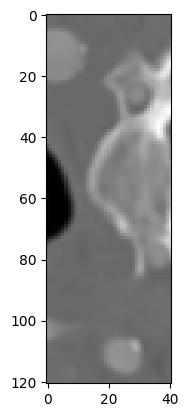

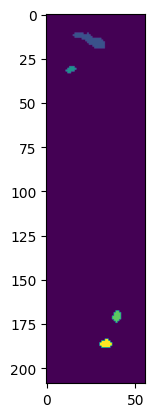

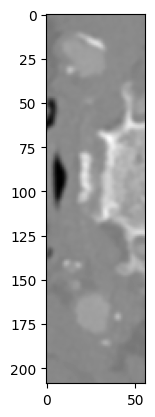

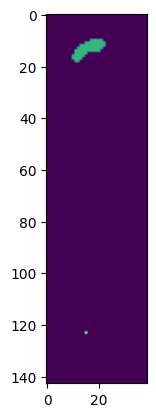

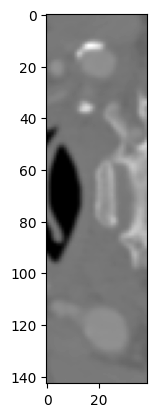

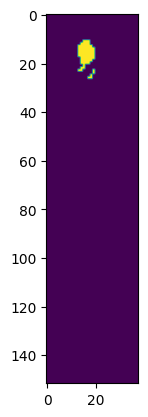

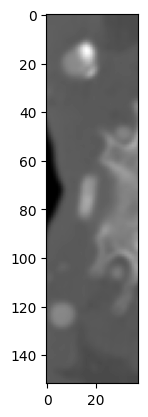

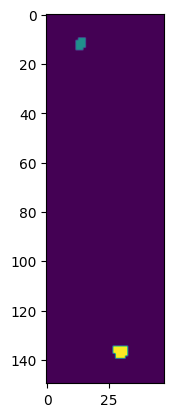

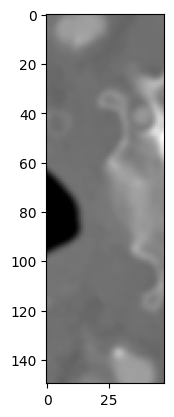

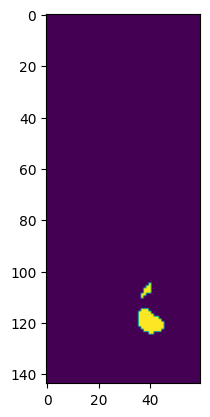

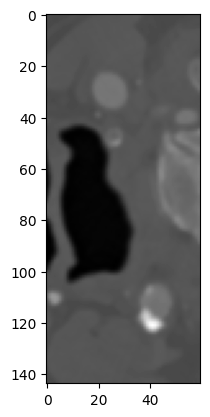

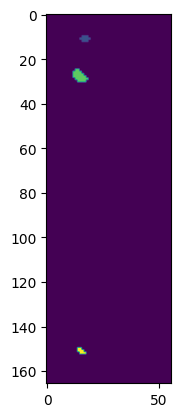

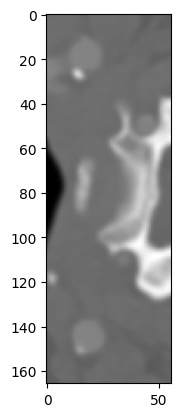

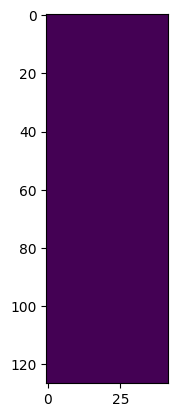

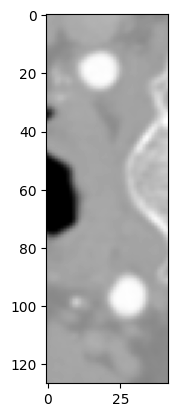

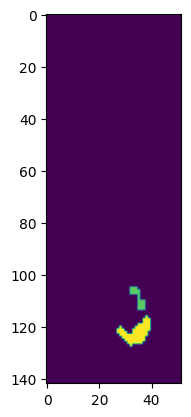

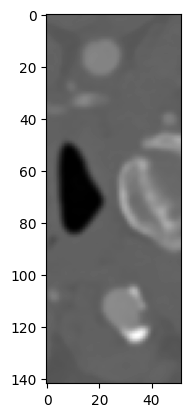

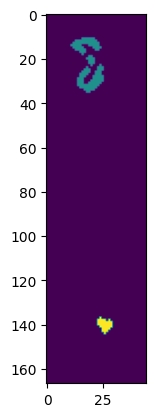

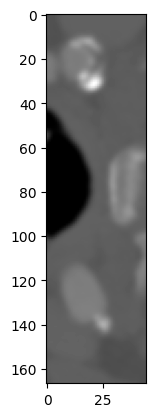

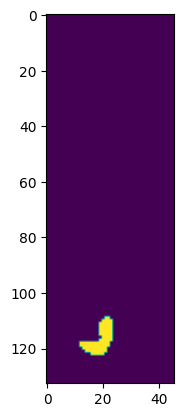

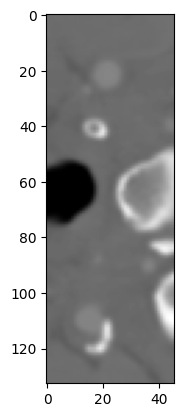

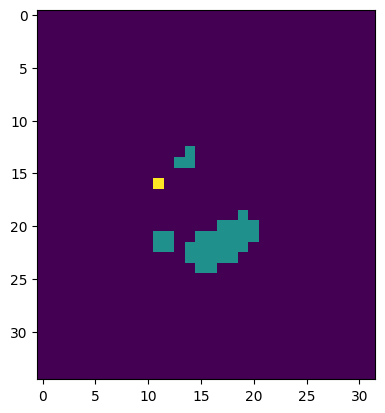

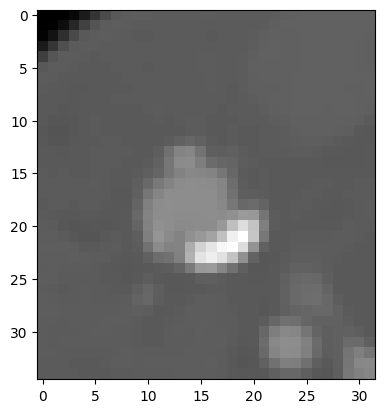

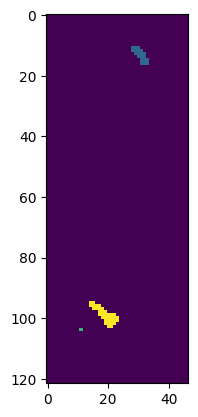

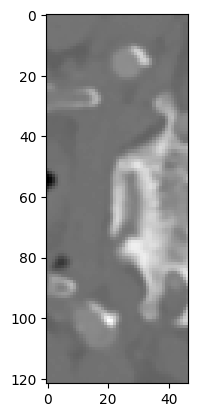

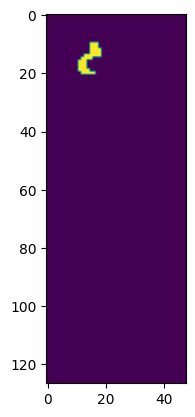

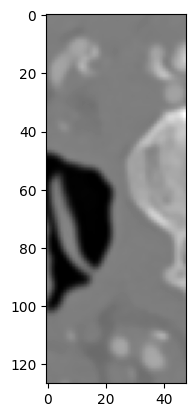

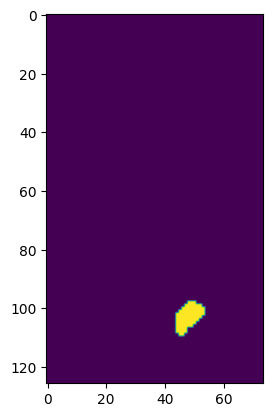

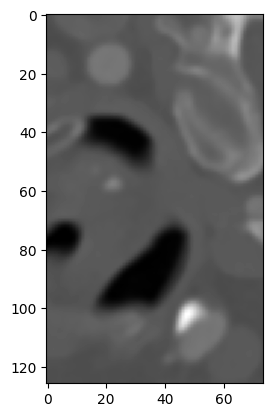

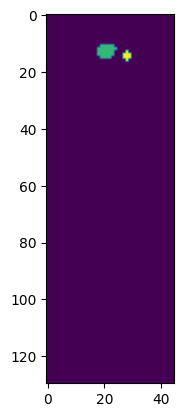

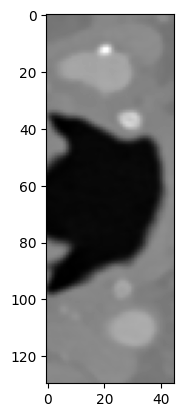

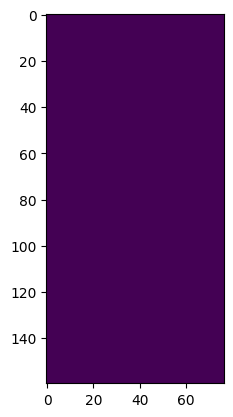

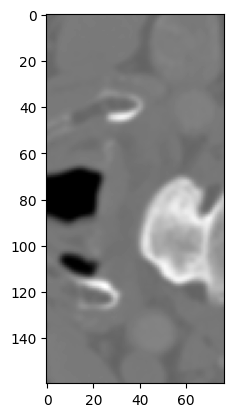

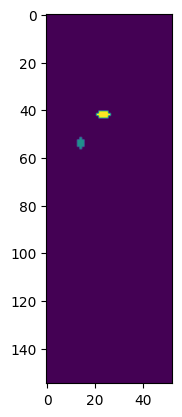

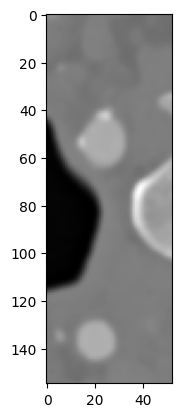

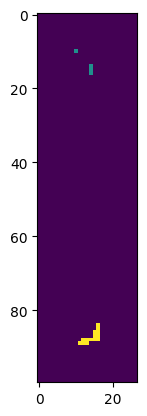

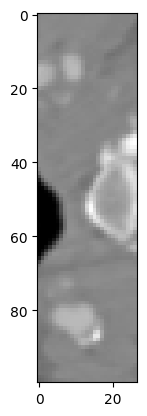

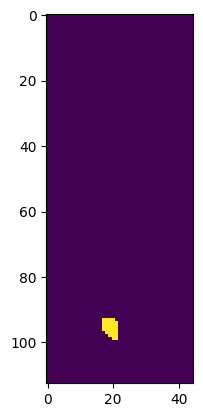

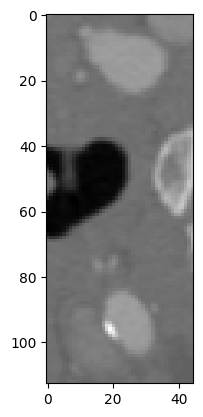

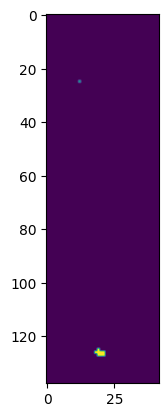

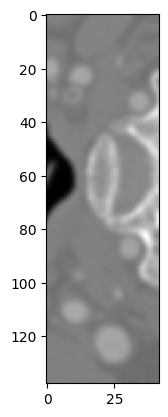

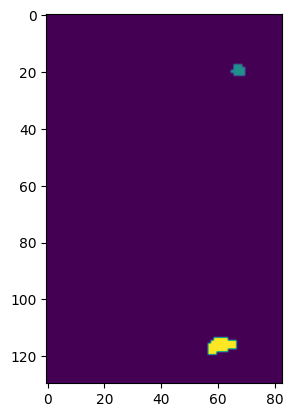

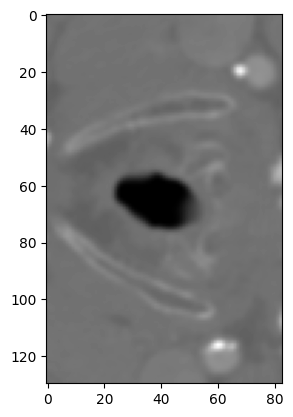

<Figure size 640x480 with 0 Axes>

In [91]:
for i in range(len(DATASETS)):
    D = DATASETS[i]

    files = os.listdir(DATAPATH + D)
    label_file = [os.path.join(DATAPATH, D, s) for s in files if 'seg' in s][0]
    image_file = [os.path.join(DATAPATH, D, i) for i in files if not 'seg' in i][0]

    label = nrrd.read(label_file)[0]
    image = nrrd.read(image_file)[0]
    print('Plaque segment count:', label.max())

    bbox = mh.bbox(label) # ignore large portion of label since its all 0
                        # to only include annotated plaque regions
        
    # crop label and image according to bbox but make it a little larger
    increase_xy = 10 
    increase_z = 0 # no increase in z
    label_cropped = label[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                        bbox[2]-increase_xy:bbox[3]+increase_xy,
                        bbox[4]-increase_z:bbox[5]+increase_z]
    image_cropped = image[bbox[0]-increase_xy:bbox[1]+increase_xy, 
                        bbox[2]-increase_xy:bbox[3]+increase_xy,
                        bbox[4]-increase_z:bbox[5]+increase_z]

    print('Image/Label shape', image_cropped.shape)

    imshow(label_cropped[:,:,3])
    plt.figure()
    imshow(image_cropped[:,:,3], cmap='gray')
    plt.figure()